In [30]:
import loompy
import os
import sys
import numpy as np
from datetime import datetime
import logging

path = '/data/proj/scATAC/chromograph/'

samples = ['232_3', '232_4']
tissue = 'Midbrain'
d = datetime.today().strftime('%Y%m%d')
outdir = os.path.join(path, 'build_' + d)

In [31]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [38]:
if not os.path.isdir(outdir):
    os.mkdir(outdir)

outfile = os.path.join(outdir, tissue + '.loom')

inputfiles = [os.path.join(path, '10X' + sample, '10X' + sample + '_10kb.loom') for sample in samples]

loompy.combine(inputfiles, outfile)

# with loompy.new(outfile) as dsout:  # Create a new, empty, loom file
#     for f in inputfiles:
#         print(f)
#         with loompy.connect(f) as ds:
#             print(ds.shape)
#             totals = ds.map([np.sum], axis=1)[0]
#             cells = np.where(totals > 500)[0] # Select the cells that passed QC (totals > 500)
#             print(sum(cells), cells.shape)
#             for (ix, selection, view) in ds.scan(items=cells, axis=1):
#                 dsout.add_columns(view.layers, col_attrs=view.ca, row_attrs=view.ra)

In [43]:
with loompy.connect(out_file)as ds:
    print(ds.shape)
    print(ds.attrs['bin_size'])

(321163, 6234)
10000


INFO:root:Bin_Analysis initialised
INFO:root:Running Bin-analysis on 6234 cells with 10kb_bins
INFO:root:Using 188799 out of 321163 bins for manifold learning
INFO:root:Binarizing the matrix
INFO:root:Selecting data for HPF factorization: 6234 cells and 188799 bins
INFO:root:Performing HPF factorization with 96 factors
INFO:root:HPF to 96 factors using 8 threads


HPF (nnz=5,487,882):   0%|          | 0/201 [00:00<?, ?it/s]

/home/camiel/cytograph-dev/cytograph/decomposition/HPF_accel3.py:48: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "compute_y_phi_batch" failed type inference due to: Invalid use of Function(<built-in function getitem>) with argument(s) of type(s): (array(int64, 1d, C), (slice<a:b>, none))
 * parameterized
In definition 0:
    All templates rejected with literals.
In definition 1:
    All templates rejected without literals.
In definition 2:
    All templates rejected with literals.
In definition 3:
    All templates rejected without literals.
In definition 4:
    All templates rejected with literals.
In definition 5:
    All templates rejected without literals.
In definition 6:
    All templates rejected with literals.
In definition 7:
    All templates rejected without literals.
In definition 8:
    All templates rejected with literals.
In definition 9:
    All templates rejected without literals.
In definition 10:
    All templat

HPF (nnz=5,487,882):   0%|          | 1/201 [00:19<1:05:37, 19.69s/it, ll=-3.2e+6]

/home/camiel/cytograph-dev/cytograph/decomposition/HPF_accel3.py:48: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "compute_y_phi_batch" failed type inference due to: Invalid use of Function(<built-in function getitem>) with argument(s) of type(s): (array(int64, 1d, C), (slice<a:b>, none))
 * parameterized
In definition 0:
    All templates rejected with literals.
In definition 1:
    All templates rejected without literals.
In definition 2:
    All templates rejected with literals.
In definition 3:
    All templates rejected without literals.
In definition 4:
    All templates rejected with literals.
In definition 5:
    All templates rejected without literals.
In definition 6:
    All templates rejected with literals.
In definition 7:
    All templates rejected without literals.
In definition 8:
    All templates rejected with literals.
In definition 9:
    All templates rejected without literals.
In definition 10:
    All templat

HPF (nnz=5,487,882):  10%|▉         | 20/201 [06:15<56:36, 18.77s/it, diff=-.0645, ll=-1.47e+6]


INFO:root:Adding Betas and Thetas to loom file
INFO:root:Calculating posterior probabilities
INFO:root:Constructing nearest-neighbor graph
/home/camiel/anaconda3/envs/chromograph/lib/python3.7/site-packages/numba/ir_utils.py:1969: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'forest' of function 'initialise_search'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../anaconda3/envs/chromograph/lib/python3.7/site-packages/pynndescent/pynndescent_.py", line 72:
@numba.njit()
def initialise_search(
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
INFO:root:Generating tSNE from thetas
INFO:root:Generating UMAP from thetas
/home/camiel/anaconda3/envs/chromograph/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' 

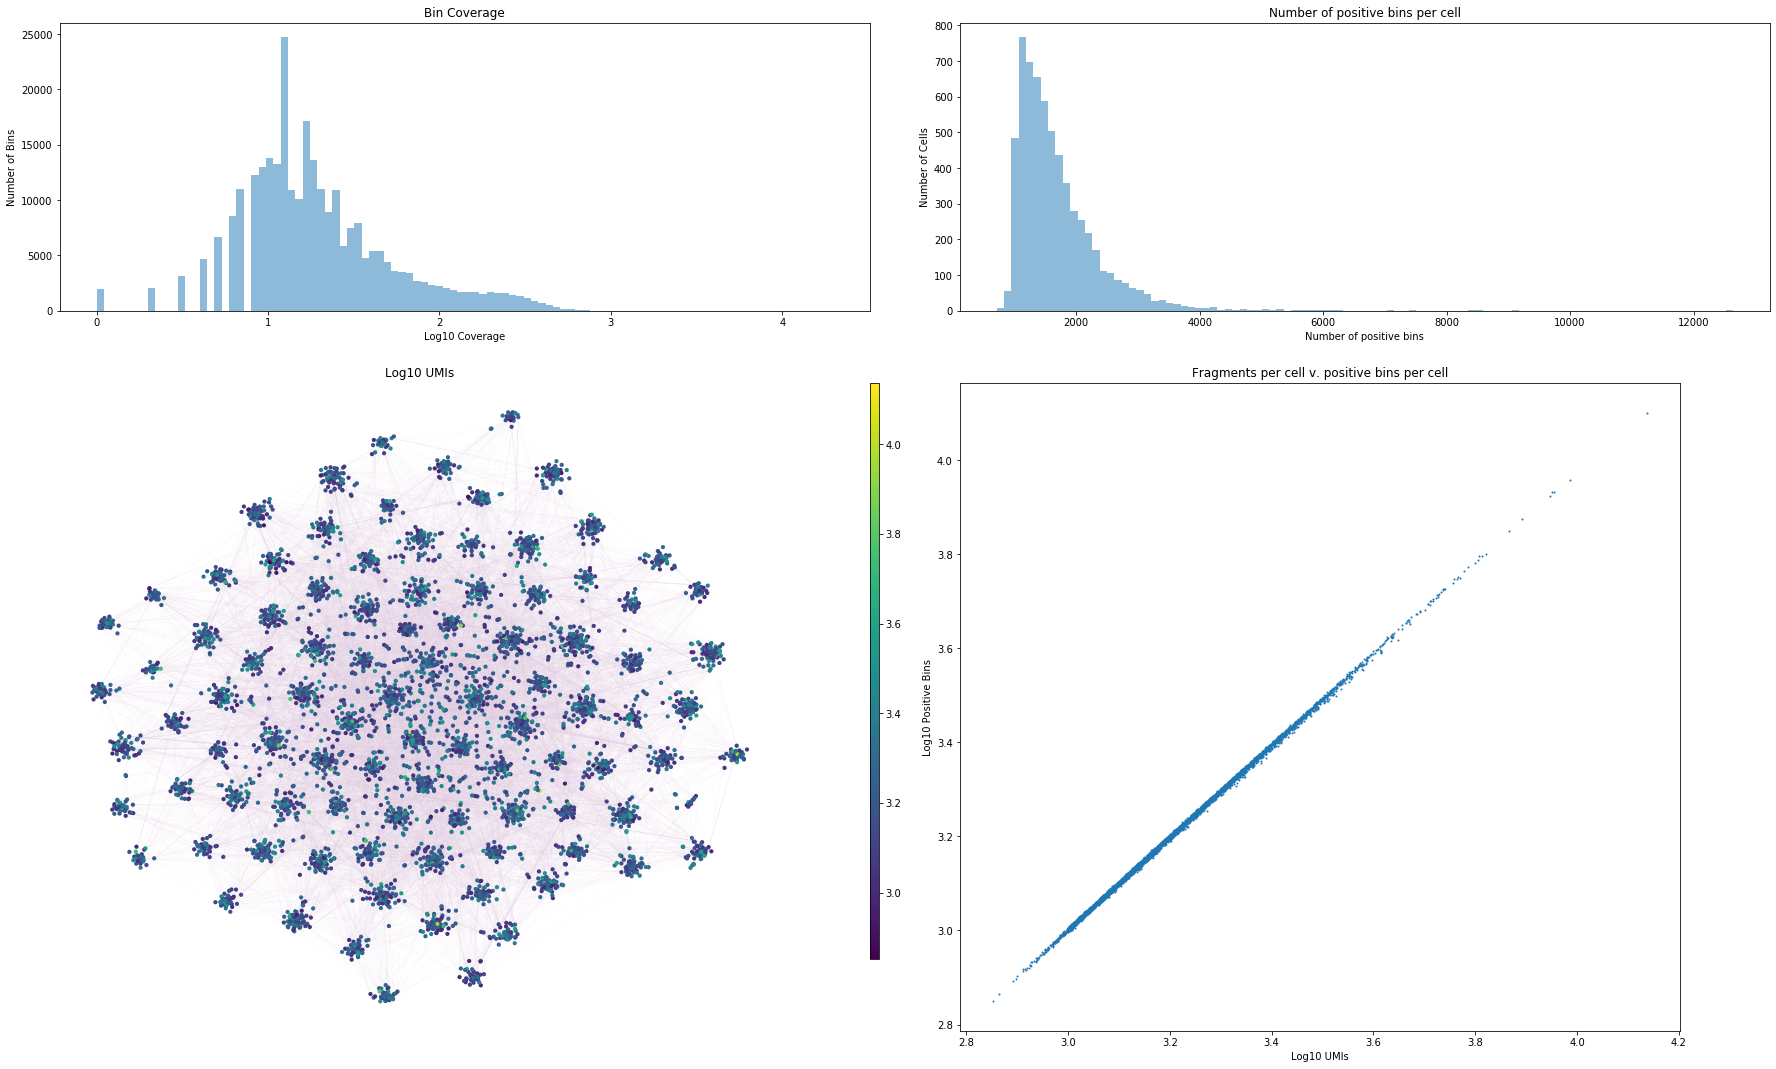

In [44]:
sys.path.append('/home/camiel/chromograph/')
from chromograph.pipeline.Bin_analysis import *

with loompy.connect(outfile) as ds:
    bin_analysis = bin_analysis()
    bin_analysis.fit(ds, outdir=outdir)